In [ ]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from datetime import datetime, date
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt 
#import datetime as dt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWi

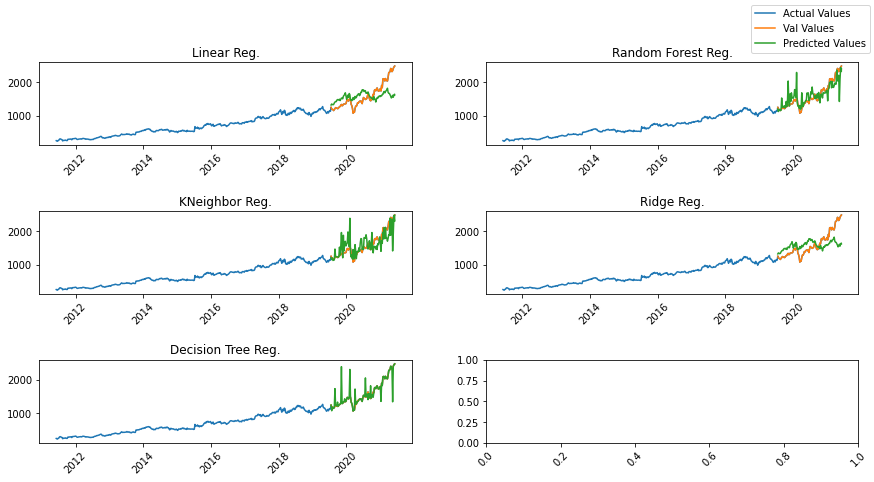

0.827214759572089
0.7554606128020871
0.7621113448093971
0.827214759616131
0.6493235343897388


In [ ]:
df=pd.read_csv("GOOG.csv",index_col='Date',parse_dates=True)                                                           
df.head()

forecast_weeks=100
scale = StandardScaler()
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date']=df['Date'].map(dt.datetime.toordinal)
df['Prediction']=df['Adj Close'].shift(-forecast_weeks)
X=np.array(df[['Adj Close','Close']][:-forecast_weeks])
y=np.array(df[['Prediction']][:-forecast_weeks])

train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=3,shuffle='False')


regr = linear_model.LinearRegression()
regr1=RandomForestRegressor(random_state=1)
regr2=KNeighborsRegressor(n_neighbors=2)
regr3 =linear_model.Ridge(alpha=0.02) 
regr4=DecisionTreeRegressor(random_state=2)

valid=df[X.shape[0]:]
valid1=df[X.shape[0]:]
valid2=df[X.shape[0]:]
valid3=df[X.shape[0]:]
valid4=df[X.shape[0]:]
x=df[['Adj Close','Close']][:-forecast_weeks]

x=x.tail(forecast_weeks)   #last x rows of feature data
x=np.array(x)
regr.fit(train_x,train_y)
regr1.fit(train_x,train_y)
regr2.fit(train_x,train_y)
regr3.fit(train_x,train_y)
regr4.fit(train_x,train_y)

pred=regr.predict(x)
pred_rfr=regr1.predict(x)
pred_eln=regr2.predict(x)
pred_svm=regr3.predict(x)
pred_dtr=regr4.predict(x)
valid['Prediction']=pred
valid1['Prediction1']=(pred_rfr)
valid2['Prediction2']=(pred_eln)
valid3['Prediction3']=(pred_svm)
valid4['Prediction4']=(pred_dtr)

fig,axs=plt.subplots(3,2,figsize=(13,7))
label=['Actual Values','Val Values','Predicted Values']
axs[0,0].plot(df['Adj Close'])
axs[0,0].plot(valid['Adj Close'])
axs[0,0].plot(valid['Prediction'])
axs[0,1].plot(df['Adj Close'])
axs[0,1].plot(valid1['Adj Close'])
axs[0,1].plot(valid1['Prediction1'])
axs[1,0].plot(df['Adj Close'])
axs[1,0].plot(valid2['Adj Close'])
axs[1,0].plot(valid2['Prediction2'])
axs[1,1].plot(df['Adj Close'])
axs[1,1].plot(valid3['Adj Close'])
axs[1,1].plot(valid3['Prediction3'])
axs[2,0].plot(df['Adj Close'])
axs[2,0].plot(valid4['Adj Close'])
axs[2,0].plot(valid4['Prediction4'])
axs[0,0].set_title('Linear Reg.')
axs[0,1].set_title('Random Forest Reg.')
axs[1,0].set_title('KNeighbor Reg.')
axs[1,1].set_title('Ridge Reg.')
axs[2,0].set_title('Decision Tree Reg.')
fig.legend(label)
for ax in axs.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.subplots_adjust(right=1,hspace=0.8)
plt.show()
print(regr.score(test_x,test_y))
print(regr1.score(test_x,test_y))
print(regr2.score(test_x,test_y))
print(regr3.score(test_x,test_y))
print(regr4.score(test_x,test_y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWi

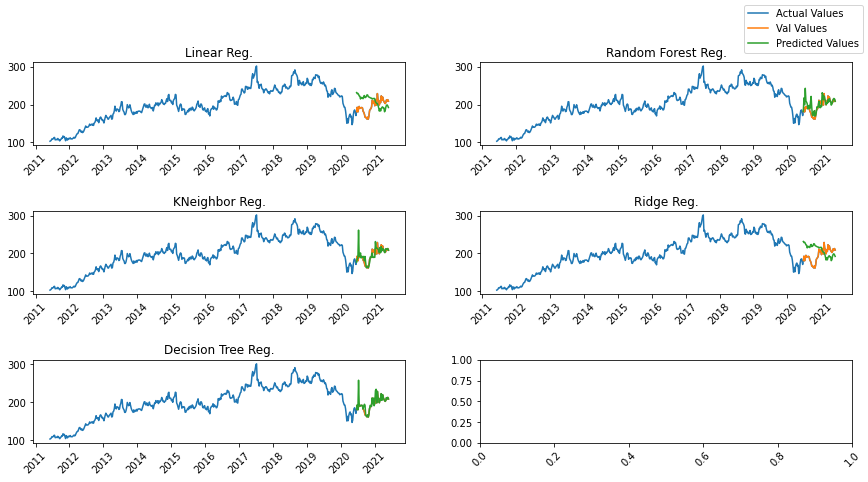

0.38158952866192486
0.6623433589903469
0.7012354960055088
0.38158952531554147
0.5169114386027809


In [ ]:
df=pd.read_csv("ITC.NS (1).csv",index_col='Date',parse_dates=True)                                                           

forecast_weeks=50
scale = StandardScaler()
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date']=df['Date'].map(dt.datetime.toordinal)
df['Prediction']=df['Adj Close'].shift(-forecast_weeks)
X=np.array(df[['Adj Close','Close']][:-forecast_weeks])
y=np.array(df[['Prediction']][:-forecast_weeks])

train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.25,random_state=100)


regr = linear_model.LinearRegression()
regr1=RandomForestRegressor(random_state=1)
regr2=KNeighborsRegressor(n_neighbors=2)
regr3 =linear_model.Ridge(alpha=0.02) 
regr4=DecisionTreeRegressor(random_state=2)

valid=df[X.shape[0]:]
valid1=df[X.shape[0]:]
valid2=df[X.shape[0]:]
valid3=df[X.shape[0]:]
valid4=df[X.shape[0]:]
x=df[['Adj Close','Close']][:-forecast_weeks]

x=x.tail(forecast_weeks)   #last x rows of feature data
x=np.array(x)
regr.fit(train_x,train_y)
regr1.fit(train_x,train_y)
regr2.fit(train_x,train_y)
regr3.fit(train_x,train_y)
regr4.fit(train_x,train_y)

pred=regr.predict(x)
pred_rfr=regr1.predict(x)
pred_eln=regr2.predict(x)
pred_svm=regr3.predict(x)
pred_dtr=regr4.predict(x)
valid['Prediction']=pred
valid1['Prediction1']=(pred_rfr)
valid2['Prediction2']=(pred_eln)
valid3['Prediction3']=(pred_svm)
valid4['Prediction4']=(pred_dtr)

fig,axs=plt.subplots(3,2,figsize=(13,7))
label=['Actual Values','Val Values','Predicted Values']
axs[0,0].plot(df['Adj Close'])
axs[0,0].plot(valid['Adj Close'])
axs[0,0].plot(valid['Prediction'])
axs[0,1].plot(df['Adj Close'])
axs[0,1].plot(valid1['Adj Close'])
axs[0,1].plot(valid1['Prediction1'])
axs[1,0].plot(df['Adj Close'])
axs[1,0].plot(valid2['Adj Close'])
axs[1,0].plot(valid2['Prediction2'])
axs[1,1].plot(df['Adj Close'])
axs[1,1].plot(valid3['Adj Close'])
axs[1,1].plot(valid3['Prediction3'])
axs[2,0].plot(df['Adj Close'])
axs[2,0].plot(valid4['Adj Close'])
axs[2,0].plot(valid4['Prediction4'])
axs[0,0].set_title('Linear Reg.')
axs[0,1].set_title('Random Forest Reg.')
axs[1,0].set_title('KNeighbor Reg.')
axs[1,1].set_title('Ridge Reg.')
axs[2,0].set_title('Decision Tree Reg.')
fig.legend(label)
for ax in axs.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.subplots_adjust(right=1,hspace=0.8)
plt.show()
print(regr.score(test_x,test_y))
print(regr1.score(test_x,test_y))
print(regr2.score(test_x,test_y))
print(regr3.score(test_x,test_y))
print(regr4.score(test_x,test_y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWi

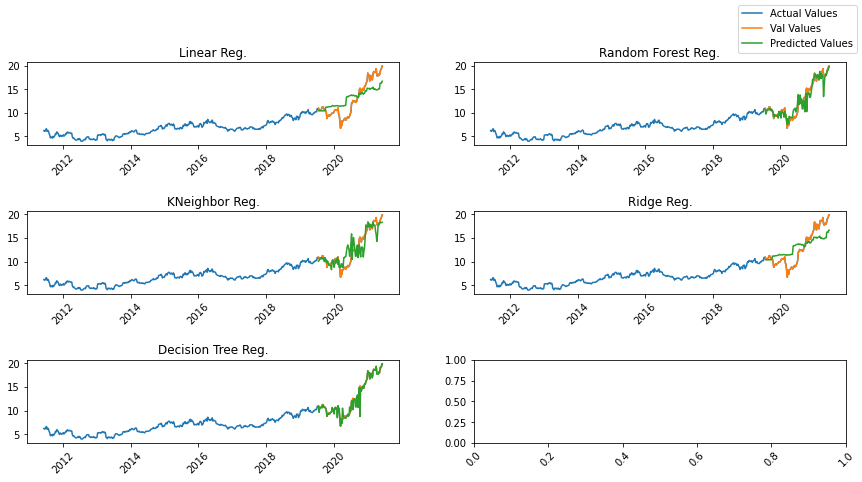

0.7962190576523148
0.8376020778404623
0.837200134894948
0.7961748912920489
0.7760364696803038


In [ ]:

df=pd.read_csv("INFY (1).csv",index_col='Date',parse_dates=True)                                                           
df.head()

forecast_weeks=100
scale = StandardScaler()
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date']=df['Date'].map(dt.datetime.toordinal)
df['Prediction']=df['Adj Close'].shift(-forecast_weeks)
X=np.array(df[['Adj Close','Close']][:-forecast_weeks])
y=np.array(df[['Prediction']][:-forecast_weeks])

train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.25,random_state=3)
regr = linear_model.LinearRegression()
regr1=RandomForestRegressor(random_state=1)
regr2=KNeighborsRegressor(n_neighbors=5)
regr3 =linear_model.Ridge(alpha=0.02) 
regr4=DecisionTreeRegressor(random_state=2)

valid=df[X.shape[0]:]
valid1=df[X.shape[0]:]
valid2=df[X.shape[0]:]
valid3=df[X.shape[0]:]
valid4=df[X.shape[0]:]
x=df[['Adj Close','Close']][:-forecast_weeks]

x=x.tail(forecast_weeks)   #last x rows of feature data
x=np.array(x)
regr.fit(train_x,train_y)
regr1.fit(train_x,train_y)
regr2.fit(train_x,train_y)
regr3.fit(train_x,train_y)
regr4.fit(train_x,train_y)

pred=regr.predict(x)
pred_rfr=regr1.predict(x)
pred_eln=regr2.predict(x)
pred_svm=regr3.predict(x)
pred_dtr=regr4.predict(x)
valid['Prediction']=pred
valid1['Prediction1']=(pred_rfr)
valid2['Prediction2']=(pred_eln)
valid3['Prediction3']=(pred_svm)
valid4['Prediction4']=(pred_dtr)

fig,axs=plt.subplots(3,2,figsize=(13,7))
label=['Actual Values','Val Values','Predicted Values']
axs[0,0].plot(df['Adj Close'])
axs[0,0].plot(valid['Adj Close'])
axs[0,0].plot(valid['Prediction'])
axs[0,1].plot(df['Adj Close'])
axs[0,1].plot(valid1['Adj Close'])
axs[0,1].plot(valid1['Prediction1'])
axs[1,0].plot(df['Adj Close'])
axs[1,0].plot(valid2['Adj Close'])
axs[1,0].plot(valid2['Prediction2'])
axs[1,1].plot(df['Adj Close'])
axs[1,1].plot(valid3['Adj Close'])
axs[1,1].plot(valid3['Prediction3'])
axs[2,0].plot(df['Adj Close'])
axs[2,0].plot(valid4['Adj Close'])
axs[2,0].plot(valid4['Prediction4'])
axs[0,0].set_title('Linear Reg.')
axs[0,1].set_title('Random Forest Reg.')
axs[1,0].set_title('KNeighbor Reg.')
axs[1,1].set_title('Ridge Reg.')
axs[2,0].set_title('Decision Tree Reg.')
fig.legend(label)
for ax in axs.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.subplots_adjust(right=1,hspace=0.8)
plt.show()
print(regr.score(test_x,test_y))
print(regr1.score(test_x,test_y))
print(regr2.score(test_x,test_y))
print(regr3.score(test_x,test_y))
print(regr4.score(test_x,test_y))